In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv('data.csv')
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%Y-%m-%d %H:%M:%S")

In [4]:
df[["AccX", "AccY", "AccZ"]] = (
    df["Acc"]
    .str.replace(" ", "")
    .str.split(",", expand=True)
    .astype(float)
)

In [5]:
df[['GyroX', 'GyroY', 'GyroZ']] = (
    df['Gyro']
    .str.replace(" ", "")
    .str.split(",", expand=True)
    .astype(float)
)

Plotting both gyroscope and accelerometer data on the same plot.

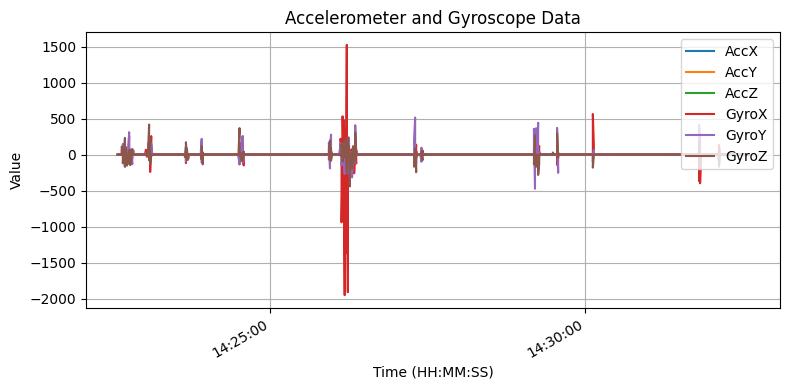

In [6]:
fig, ax = plt.subplots( figsize=(8, 4) )
df.plot(x='Datetime', y='AccX', ax=ax, label='AccX')
df.plot(x='Datetime', y='AccY', ax=ax, label='AccY')
df.plot(x='Datetime', y='AccZ', ax=ax, label='AccZ')
df.plot(x='Datetime', y='GyroX', ax=ax, label='GyroX')
df.plot(x='Datetime', y='GyroY', ax=ax, label='GyroY')
df.plot(x='Datetime', y='GyroZ', ax=ax, label='GyroZ')

plt.title('Accelerometer and Gyroscope Data')
plt.xlabel('Time (HH:MM:SS)')
plt.ylabel('Value')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()

Accelerometor data and gyroscope data, but now in two different plots. I believe it's more clear to see the data in two different plots as gyroscope values are much larger than accelerometer values.

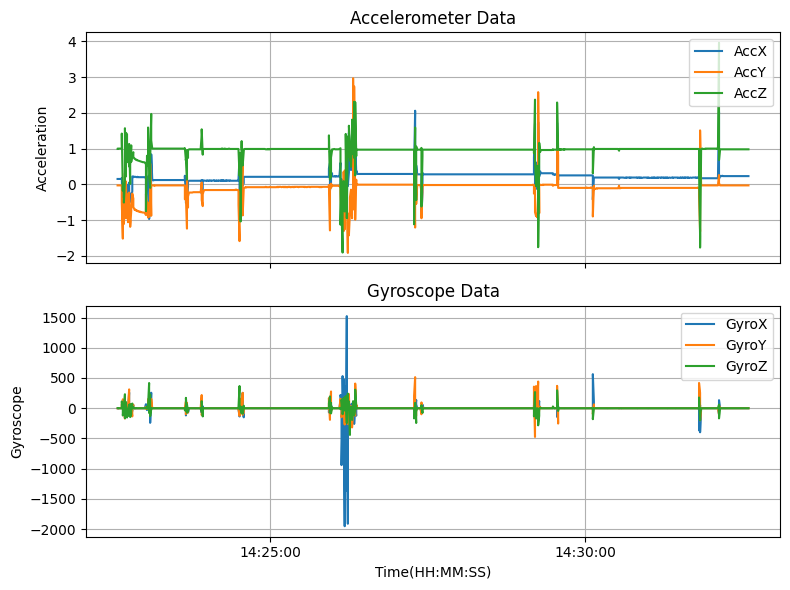

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

ax1.set_title("Accelerometer Data")
ax1.plot(df["Datetime"], df["AccX"], label="AccX")
ax1.plot(df["Datetime"], df["AccY"], label="AccY")
ax1.plot(df["Datetime"], df["AccZ"], label="AccZ")
ax1.set_ylabel("Acceleration")
ax1.legend(loc="upper right")
ax1.grid()

ax2.set_title("Gyroscope Data")
ax2.plot(df["Datetime"], df["GyroX"], label="GyroX")
ax2.plot(df["Datetime"], df["GyroY"], label="GyroY")
ax2.plot(df["Datetime"], df["GyroZ"], label="GyroZ")
ax2.set_xlabel("Time(HH:MM:SS)")
ax2.set_ylabel("Gyroscope")
ax2.legend(loc="upper right")
ax2.grid()

plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.show()

In [34]:
acc_columns = ["AccX", "AccY", "AccZ"]
gyro_columns = ["GyroX", "GyroY", "GyroZ"]
df_updated = df[(df[acc_columns].abs() > 0.14).all(axis=1)]
df_updated = df_updated.drop(columns=['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Datetime'])
df_updated.to_csv("data_updated.csv", index=False)
df_updated["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%Y-%m-%d %H:%M:%S")
df_updated = df_updated.drop_duplicates(subset=["Datetime"])

In [35]:
df_updated[["AccX", "AccY", "AccZ"]] = (
    df_updated["Acc"]
    .str.replace(" ", "")
    .str.split(",", expand=True)
    .astype(float)
)

df_updated[['GyroX', 'GyroY', 'GyroZ']] = (
    df_updated['Gyro']
    .str.replace(" ", "")
    .str.split(",", expand=True)
    .astype(float)
)

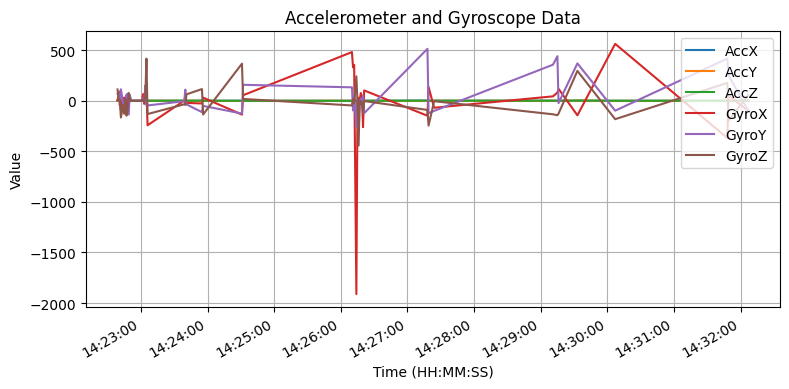

In [43]:
fig, ax = plt.subplots( figsize=(8, 4) )
df_updated.plot(x='Datetime', y='AccX', ax=ax, label='AccX')
df_updated.plot(x='Datetime', y='AccY', ax=ax, label='AccY')
df_updated.plot(x='Datetime', y='AccZ', ax=ax, label='AccZ')
df_updated.plot(x='Datetime', y='GyroX', ax=ax, label='GyroX')
df_updated.plot(x='Datetime', y='GyroY', ax=ax, label='GyroY')
df_updated.plot(x='Datetime', y='GyroZ', ax=ax, label='GyroZ')

plt.title('Accelerometer and Gyroscope Data')
plt.xlabel('Time (HH:MM:SS)')
plt.ylabel('Value')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()

The accelerometer data is a bit tricky to filter out because the gravity force is always present and registered on one of the axes. This makes the accelerometer data less clean compared to the gyroscope data. When inspecting the data, there's always a spike in one of the axes when the microcontroller is stationary, depending on which side it's laying on. To handle this, I simply added a 0.05 threshold for all axes to shrink the data to a more reasonable size.

That said, I’m not happy with the graph, it’s still not clean due to the massive difference between the gyroscope and accelerometer data. It would actually be more useful to filter out the gyroscope data instead, since the gyroscope produces 0 or close to 0 values on all axes when the device isn’t moving.

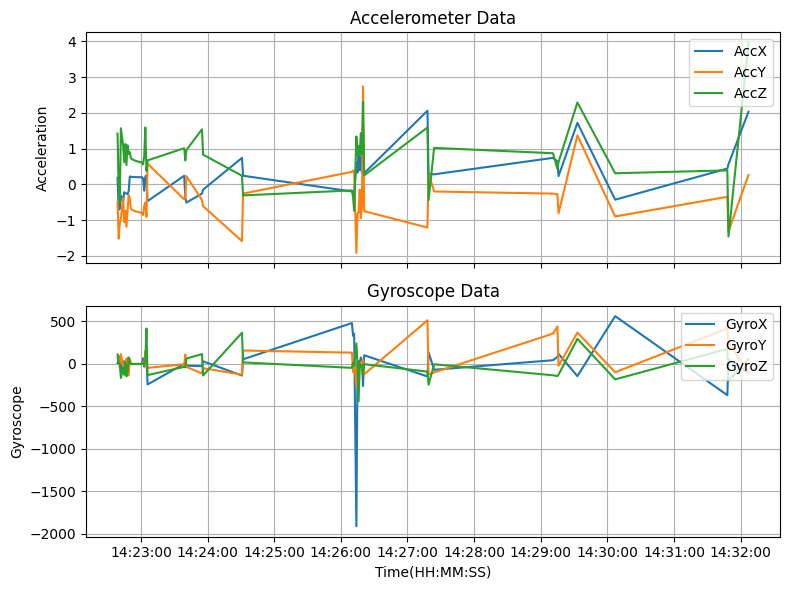

In [45]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

ax1.set_title("Accelerometer Data")
ax1.plot(df_updated["Datetime"], df_updated["AccX"], label="AccX")
ax1.plot(df_updated["Datetime"], df_updated["AccY"], label="AccY")
ax1.plot(df_updated["Datetime"], df_updated["AccZ"], label="AccZ")
ax1.set_ylabel("Acceleration")
ax1.legend(loc="upper right")
ax1.grid()

ax2.set_title("Gyroscope Data")
ax2.plot(df_updated["Datetime"], df_updated["GyroX"], label="GyroX")
ax2.plot(df_updated["Datetime"], df_updated["GyroY"], label="GyroY")
ax2.plot(df_updated["Datetime"], df_updated["GyroZ"], label="GyroZ")
ax2.set_xlabel("Time(HH:MM:SS)")
ax2.set_ylabel("Gyroscope")
ax2.legend(loc="upper right")
ax2.grid()

plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.show()